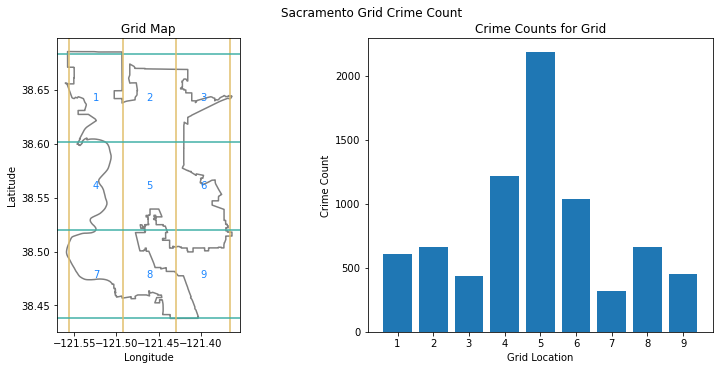

In [125]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

sacramento = geopandas.read_file('resources/shapefile').iloc[5:6]

crimes=pd.read_csv('resources/filtered/sacramento_crime_2006_filtered.csv')

lon_min = crimes['longitude'].min()
lon_max = crimes['longitude'].max()
lon_inc = (lon_max - lon_min)/3

lat_min = crimes['latitude'].min()
lat_max = crimes['latitude'].max()
lat_inc = (lat_max - lat_min)/3

lats = [lat_max]
lons = [lon_max]

for i in range(3):
    lats.append((i * lat_inc) + lat_min)
    lons.append((i * lon_inc) + lon_min)

fig, ax = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(10)
fig.suptitle('Sacramento Grid Crime Count')
fig.tight_layout()
fig.subplots_adjust(left=-0.05)


### Grid Stuff ###
ax[0].set_title('Grid Map')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')

sacramento.boundary.plot(color='grey', ax=ax[0])

for i in range(4):
    ax[0].axvline(x=lons[i], color='#E1BE6A')
    ax[0].axhline(y=lats[i], color='#40B0A6')

text_kwargs = {'set_horizontalalignment':'center', 'set_verticalalignment':'center'}

annotation_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9]
annotation_iter = 0
for i in range(5, 0, -2):
    for j in range(1, 6, 2):
        ax[0].annotate(text=annotation_labels[annotation_iter],
           xy=(0,0),
           xytext=(lon_min + (j * lon_inc/2), lat_min + (i * lat_inc/2)),
           annotation_clip=False,
           color='#1A85FF',
           verticalalignment='center',
           horizontalalignment='center')
        annotation_iter += 1

### Histogram Stuff ###
ax[1].set_xlabel('Grid Location')
ax[1].set_ylabel('Crime Count')
ax[1].set_title('Crime Counts for Grid')

grid_counts = []

for i in range(3):
    for j in range(3):
        subcrimes = crimes[crimes['longitude'] >= lon_min + (i * lon_inc)]
        subcrimes = subcrimes[subcrimes['longitude'] < lon_min + ((i + 1) * lon_inc)]
        subcrimes = subcrimes[subcrimes['latitude'] <= lat_max - (j * lat_inc)]
        subcrimes = subcrimes[subcrimes['latitude'] > lat_max - ((j + 1) * lat_inc)]
        grid_counts.append(len(subcrimes.index))

ax[1].bar(annotation_labels, grid_counts)
ax[1].locator_params(axis='x', nbins=10)

fig.savefig('grid.png')